In [34]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn


def standardize(dataframe, col):
    dataframe[col] = (dataframe[col] - dataframe[col].mean()) / dataframe[col].std()

df = pd.read_csv("X_train.csv", error_bad_lines=False)
df = pd.concat((df, pd.read_csv("X_test.csv", error_bad_lines=False)), ignore_index=True)

df.drop(['id', 'image_width', 'image_height', 'image_url'], axis = 1, inplace = True)
print(df.describe())
print(df.columns)

       images_count          year  product_width  product_length   shoe_size  \
count  11840.000000  1.983000e+03      153.00000      131.000000  300.000000   
mean       3.654645  1.166698e+04       45.79281       67.487023   39.033333   
std        2.057843  4.311602e+05       28.43733       41.744412    2.920156   
min        0.000000  0.000000e+00       10.00000       23.000000   16.000000   
25%        2.000000  1.979000e+03       30.00000       35.000000   37.000000   
50%        3.000000  1.998000e+03       40.00000       50.000000   39.000000   
75%        5.000000  2.007000e+03       50.00000       80.000000   41.000000   
max       29.000000  1.920193e+07      180.00000      250.000000   48.000000   

       product_height        weight         price  
count      163.000000  1.183600e+04  11840.000000  
mean        63.036810  8.965613e+03     21.795489  
std         31.945389  9.095875e+04     45.683665  
min          9.000000  1.000000e-01      0.500000  
25%         45.7500

b'Skipping line 2168: expected 31 fields, saw 33\nSkipping line 4822: expected 31 fields, saw 37\nSkipping line 4859: expected 31 fields, saw 37\nSkipping line 7342: expected 31 fields, saw 37\n'


0


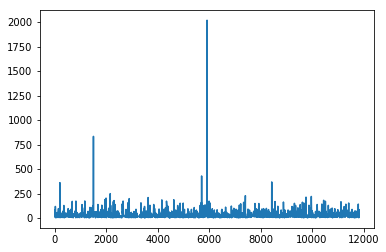

In [23]:
df.loc[df['year'] > 2019, 'year'] = 2019
df['year'].fillna(2019, inplace = True)
print(sum(df['year'].isnull()))

df['age'] = 2019 - df['year']
df.drop(['year'], axis = 1, inplace = True)
plt.plot(df[df['age'] > 0]['age'])
plt.show()

a


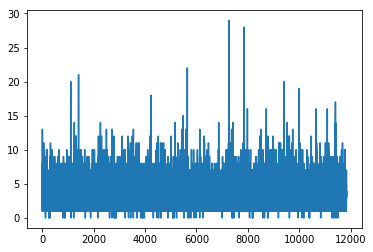

a


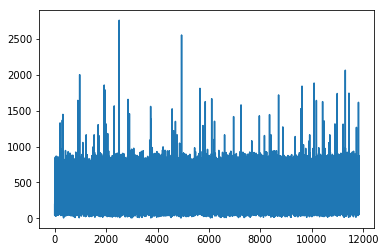

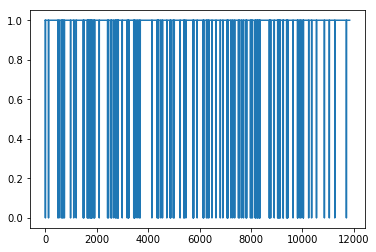

In [24]:
df['images_count'].fillna(0, inplace = True)
standardize(df, "images_count")
plt.plot(df['images_count'])
plt.show()

df['product_description'].fillna("", inplace = True)
df['desc_len'] = df['product_description'].str.len()
df.drop(['product_description'], axis = 1, inplace = True)
standardize(df, "desc_len")
plt.plot(df['desc_len'])
plt.show()

df['warranty'] = df['warranty'].isnull()
plt.plot(df['warranty'])
plt.show()

df['has_color'] = df['color'].isnull()
df.drop(['color'], axis = 1, inplace = True)

df['wifi'].fillna(False, inplace = True)


In [25]:
import unidecode
df['has_material'] = df['material'].isnull()
df['has_brand'] = df['brand'].isnull()
# df['material'].fillna("", inplace = True)
# df['material'] = df['material'].apply(unidecode.unidecode)
# df['material'] = df['material'].apply(str.strip)
# df['material'] = df['material'].apply(str.replace, args = (" ", ""))
df.drop(['material', 'brand'], axis = 1, inplace = True)

df['has_vintage'] = df['vintage'].isnull() == False
df['vintage'].fillna(False, inplace = True)


In [26]:
standardize(df, 'price')

dummies = pd.get_dummies(df['condition'], drop_first = True)
df = df.join(dummies)
df.drop(['condition'], axis = 1, inplace = True)

dummies = pd.get_dummies(df['store_name'], drop_first = True)
df = df.join(dummies)
df.drop(['store_name'], axis = 1, inplace = True)

dummies = pd.get_dummies(df['category'], drop_first = True)
df = df.join(dummies)
df.drop(['category'], axis = 1, inplace = True)


df['has_author'] = df['author'].isnull()
df['has_editor'] = df['editor'].isnull()
df['has_cat_1'] = df['sub_category_1'].isnull() == False
df['has_cat_2'] = df['sub_category_2'].isnull() == False
df['has_cat_3'] = df['sub_category_3'].isnull() == False
df['has_cat_4'] = df['sub_category_4'].isnull() == False
df.drop(['author', 'editor'], axis = 1, inplace = True)
df.drop(['sub_category_1', "sub_category_2", "sub_category_3", "sub_category_4"], axis = 1, inplace = True)
df['weight'].fillna(0, inplace = True)
standardize(df, 'weight')

df.drop(['product_name'], axis = 1, inplace = True)


a
a


In [27]:
for idx,val in enumerate(df['product_size']):
    if (str(val).isnumeric()):
        if int(val) <= 36:
            df.at[idx, 'product_size'] = "S"
        elif int(val) <= 41: 
            df.at[idx, 'product_size'] = "M"
        elif int(val) <= 44: 
            df.at[idx, 'product_size'] = "L"
        elif int(val) <= 48: 
            df.at[idx, 'product_size'] = "XL"
        elif int(val) <= 52: 
            df.at[idx, 'product_size'] = "XXL"
        else:
            df.at[idx, 'product_size'] = "XXXL"
    else:
        if val == "T0":
            df.at[idx, 'product_size'] = 'XS'
        elif val == "T1":
            df.at[idx, 'product_size'] = 'S'
        elif val == "T2":
            df.at[idx, 'product_size'] = 'M'
        elif val == "T3":
            df.at[idx, 'product_size'] = 'L'
        elif val == "T4":
            df.at[idx, 'product_size'] = 'XL'
        elif val == "T5":
            df.at[idx, 'product_size'] = 'XXL'
        elif val == "T6" or val == "T7" or val == "T8":
            df.at[idx, 'product_size'] = 'XXXL'

df['product_size'].fillna("no_size", inplace = True)

dummies = pd.get_dummies(df['product_size'])
df = df.join(dummies)
df.drop(['product_size'], axis = 1, inplace = True)



In [28]:
df['product_height'].fillna(0, inplace = True)
df['product_width'].fillna(0, inplace = True)
df['product_length'].fillna(0, inplace = True)
df['shoe_size'].fillna(0, inplace = True)

In [29]:
X_train, X_test = df[:8880], df[8880:]


In [30]:
from sklearn.model_selection import train_test_split

Y_train = pd.read_csv("y_train.csv")
Y_train.drop(['id'], axis =1, inplace =True)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42)


In [31]:
classifiers = {}

from sklearn.ensemble import RandomForestClassifier
classifiers['random_forest'] = RandomForestClassifier(random_state=42, n_estimators=400)

# from sklearn.linear_model import LogisticRegression
# classifiers['logistic_regression'] = LogisticRegression(solver = 'lbfgs', max_iter = 2000, multi_class = 'multinomial')

import xgboost as xgb
from xgboost import XGBClassifier
classifiers['xgboost'] = XGBClassifier(n_estimators=200, learning_rate=0.08, gamma=2, subsample=1, max_depth=12)


In [32]:
#evaluation function

from sklearn.metrics import log_loss 

def evaluate(y_pred, y_true):
    false = 0
    true = 0
    for pred, truth in zip(y_pred, y_true['duration']):
        if (pred != truth):
            false += 1
        else:
            true += 1
    print ("Accuracy : " + str(true / (false + true)))

def prob_to_df(proba):
    df = pd.DataFrame()
    df['cat0'] = proba[:,0]
    df['cat1'] = proba[:,1]
    df['cat2'] = proba[:,2]
    return df



In [2]:
#stacking
X_train_stack = {}
X_val_stack = {}
for key, val in classifiers.items():
    print("Training " + key + "...")
    val.fit(X_train, Y_train['duration'])
    X_val_stack[key] = prob_to_df(val.predict_proba(X_val))
    Y_pred = val.predict(X_val)
    evaluate(Y_pred, Y_val)
    print ("Log loss: " + str(log_loss(y_pred = val.predict_proba(X_val), y_true = Y_val['duration'])))
    X_train_stack[key] = prob_to_df(val.predict_proba(X_train))



NameError: name 'classifiers' is not defined

In [3]:
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer


ppl = Pipeline([("imputer", Imputer(strategy='median')),
                ("clf", classifiers['random_forest'])])

pred_cv = cross_val_predict(ppl, X_train, np.ravel(Y_train),
                            method='predict_proba', cv=5, n_jobs=-1)

print("LogLoss on train sample (CV):",log_loss(y_pred=pred_cv, y_true=Y_train))

NameError: name 'classifiers' is not defined

In [ ]:
def show_feature_imp(model):
    model = classifiers[model]
    imp = {k:x for k,x in zip(X_train.columns, model.feature_importances_) if x > 0.008}
    plt.bar(imp.keys(), imp.values())
    plt.xticks(rotation='vertical')
    plt.show()

# show_feature_imp('xgboost')
# show_feature_imp('random_forest')
# show_feature_imp('logistic_regression')

In [ ]:
# def merge_df(df):
#     train_final = pd.DataFrame()
#     col = "col_"
#     i = 0
#     for key, array in df.items():
#         for val in array.columns:
#             train_final[col + str(i)] = array[val]
#             i += 1
#     train_final['data0'] = (train_final['col_0'] + train_final['col_3'] + train_final['col_6']) / 3
#     train_final['data1'] = (train_final['col_1'] + train_final['col_4'] + train_final['col_7']) / 3
#     train_final['data2'] = (train_final['col_2'] + train_final['col_5'] + train_final['col_8']) / 3
#     i = 0
#     for i in range(3 * len(df)):
#         train_final.drop(["col_" + str(i)], axis = 1, inplace = True)
#     return train_final

# train_final = merge_df(X_train_stack)
# val_final = merge_df(X_val_stack)

In [ ]:
# model_stack = RandomForestClassifier(random_state=42, n_estimators=200)
# model_stack.fit(train_final, Y_train['duration'])

# Y_pred = model_stack.predict(val_final)
# evaluate(Y_pred, Y_val)


In [ ]:
# X_test_stack = {}
# for key, val in classifiers.items():
#     X_test_stack[key] = prob_to_df(val.predict_proba(X_test))
    
# test_final = merge_df(X_test_stack)    

# results = model_stack.predict_proba(test_final)
results = classifiers['random_forest'].predict_proba(X_test)

print(results)


In [ ]:
print(test_final)

In [ ]:
import os

if (os.path.exists('submission.txt')):
    os.remove('submission.txt')
with open('submission.txt', 'w') as file:
    file.write("id,0,1,2\n")
    for i, result in enumerate(results):
        line = str(i) + ',' + str(result[0]) + ',' + str(result[1]) + ',' + str(result[2]) + '\n'
        file.write(line)
    print("Write successfull")


In [ ]:
df_submission = pd.read_csv("submission.txt")
df_submission.drop(['id'], axis =1, inplace = True)


In [ ]:
# import math, requests

# def submit_prediction(df, sep=',', comment='', compression='gzip', **kwargs):
#     TOKEN='81492eed9c5b71b37c3d11349ca4470842635e2f584852ea4a711739ccde604846844e03af931c3f6ee9afea3fb88c2b757b1839b2ebd849c334a451510dac8f'
#     URL='https://qscore.datascience-olympics.com/api/submissions'
#     df.to_csv('temporary.dat', sep=sep, compression=compression, **kwargs)
#     r = requests.post(URL, headers={'Authorization': 'Bearer {}'.format(TOKEN)},files={'datafile': open('temporary.dat', 'rb')},data={'comment':comment, 'compression': compression})
#     if r.status_code == 429:
#         raise Exception('Submissions are too close. Next submission is only allowed in {} seconds.'.format(int(math.ceil(int(r.headers['x-rate-limit-remaining']) / 1000.0))))
#     if r.status_code != 200:
#         raise Exception(r.text)
        
# submit_prediction(df_submission, sep=',', index=True, comment='my submission')